#### This code implements the K-means algorithm to idenitfy clusters from the regions of interest captured from Sanborn Insurance Maps. 


In [14]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
def readInputImages(input_src: str) -> list:
    
    '''
    Function to return input images given input source directory
    
    '''
    
    input_img = []
    
    for filename in os.listdir(input_src):      
        
        input_img.append(os.path.join(input_src , filename))
        
    
    
    return input_img



In [6]:
input_src = os.getcwd() + '\\roi'

input_img = readInputImages(input_src)

print('# of Input Images: {}'.format(len(input_img)))


# of Input Images: 93


In [48]:
# Create input array

row , col = (64 , 64)

x_arr = np.zeros((len(input_img) , row * col), np.uint8)

x_list = []


for i in range(len(input_img)):
    
    x = cv2.imread(input_img[i])
    x_gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    x_gray = x_gray.flatten()
    x_gray = x_gray.reshape(1 , row * col)  
    x_list.append(x_gray)

    
x_arr = np.concatenate(x_list , axis = 0)
print('Input array dimensions: ' , x_arr.shape)

Input array dimensions:  (93, 4096)


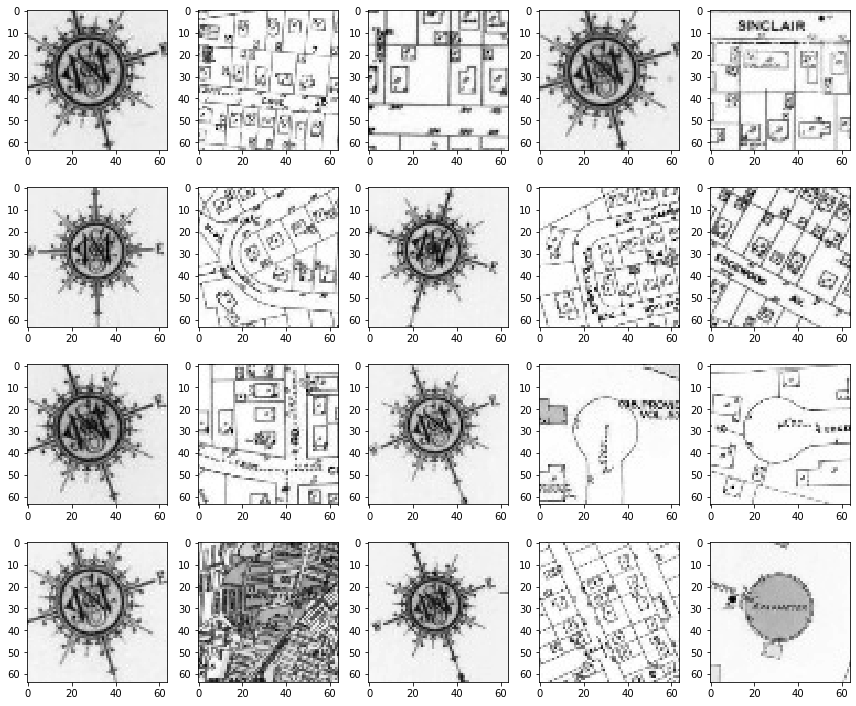

In [50]:
# Display Images

# x_arr = np.where(x_arr > 0, 1, 0)

x_arr_copy = x_arr.copy()

plt.figure(figsize = (12 , 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    plt.imshow((x_arr[i , :].reshape(64 , 64)) , cmap = 'gray')

plt.tight_layout()
plt.show()

In [108]:
# Apply K-means
num = 10

# this will hold the centroid adjustment errors
euc_dist_err = []

for i in range(1, num + 1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,  n_init = num, random_state = 0)
    kmeans.fit(x_arr)
    euc_dist_err.append(kmeans.inertia_)

In [109]:
print(euc_dist_err)

[556878405.7849462, 429648817.06256163, 376299020.5846905, 359621744.7337397, 343022730.3800531, 334173695.013971, 319886594.79487175, 312162049.4333333, 300357708.3752911, 291108590.37685406]


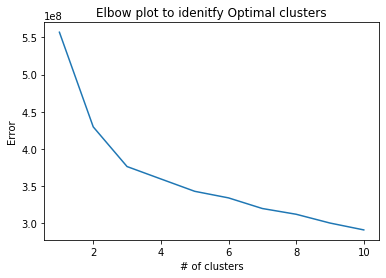

In [110]:
plt.plot(range(1 , num + 1) , euc_dist_err)
plt.title('Elbow plot to idenitfy Optimal clusters')
plt.xlabel('# of clusters')
plt.ylabel('Error')
plt.show()

In [103]:
# this will be error prone, but the problem requires only 2 classes 
num_clusters = 2

k_means = KMeans(n_clusters = num_clusters, init = 'k-means++', max_iter = 600, n_init = 20, random_state = 0)

k_means.fit(x_arr)

y_pred = k_means.predict(x_arr)

In [104]:
# display labels
print(y_pred , len(y_pred))

[1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1] 93


(35, 4096)


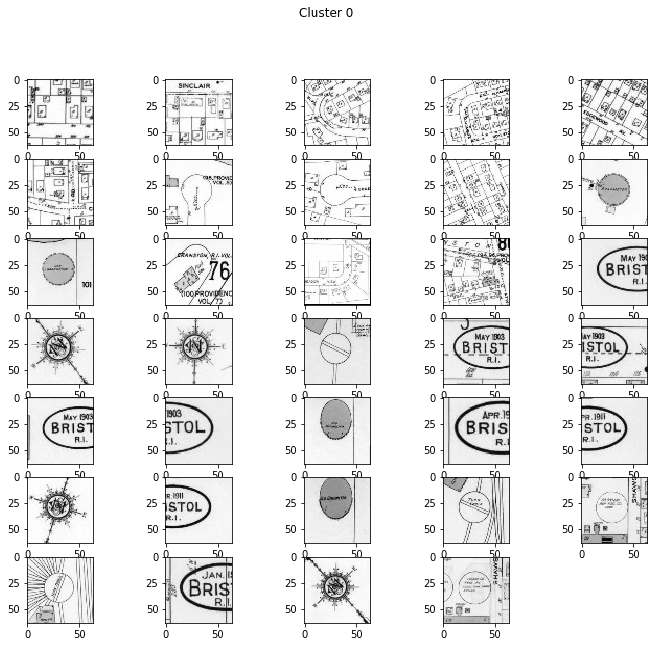

In [114]:
# idenitfy the two clusters
cluster_0 = (y_pred == 0)

x_arr_cluster_0 = x_arr[cluster_0 , :]

print(x_arr_cluster_0.shape)

len_row = x_arr_cluster_0.shape[0]


plt.figure(figsize = (12 , 10))
for i in range(1, len_row):
    plt.subplot(7, 5, i)
    plt.imshow((x_arr_cluster_0[i , :].reshape(64 , 64)) , cmap = 'gray')

#plt.tight_layout() -> This hides the title
plt.suptitle('Cluster 0')
plt.show()

(58, 4096)


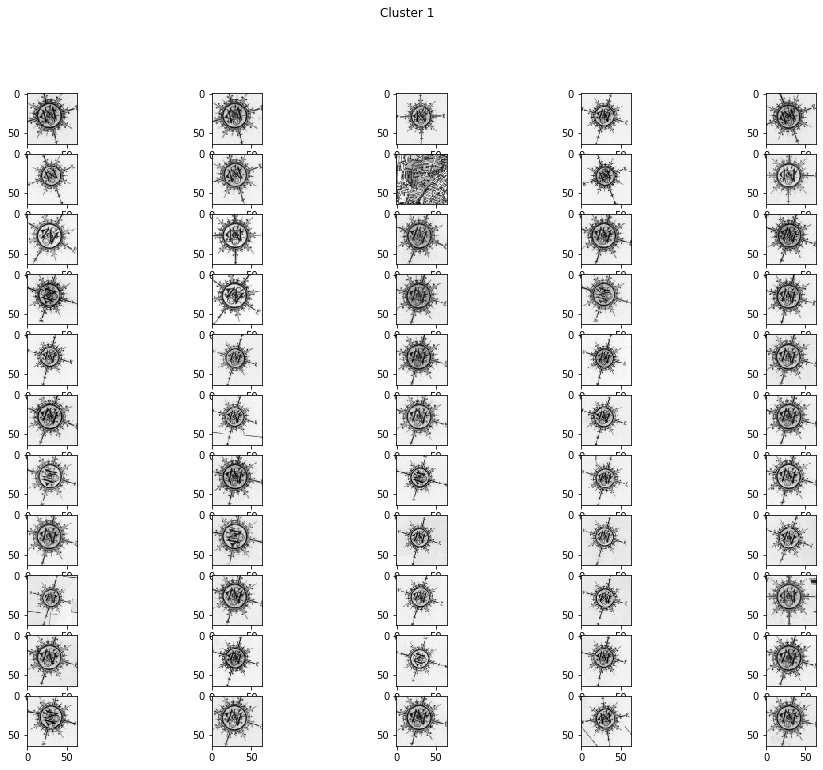

In [115]:
cluster_1 = (y_pred == 1)

x_arr_cluster_1 = x_arr[cluster_1 , :]

print(x_arr_cluster_1.shape)

len_row = x_arr_cluster_1.shape[0]


plt.figure(figsize = (16 , 12))
for i in range(1, 56):
    plt.subplot(11, 5, i)
    plt.imshow((x_arr_cluster_1[i , :].reshape(64 , 64)) , cmap = 'gray')

# plt.tight_layout()
plt.suptitle('Cluster 1')
plt.show()

References:
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [K-means MNIST](https://johnloeber.com/docs/kmeans.html)
- [K-means 2D](https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad) 